# This project implemented by Elham Mahdipour
## I am a Ph.D. Graduate  of computer engineering at Yazd University, Yazd, Iran.
## I am a Faculty Member of Computer Engineering Department at Khavaran Institute of Higher Education, Mashhad, Iran.
### Please feel free and contact to me: elham.mahdipour@gmail.com/ e.mahdipour@profs.khi.ac.ir

# Please run all cells for train the RENA model. This program train RENA for scerevisiae and AThaliana species.

# Phase 1 
## Create Dataset and Preprocessing

In [1]:
import networkx as nx
G1=nx.read_leda('biogrid samples\scerevisiae.gw')
G1

In [2]:
G2=nx.read_leda('biogrid samples\AThaliana.gw')
G2

In [3]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

5831
5897


In [4]:
G_target_na=nx.read_weighted_edgelist('biogrid samples\sc-AT.tsv')
G_target_na  

In [5]:
len(G_target_na)

1440

In [6]:
ed1=G1.edges()
ed2=G2.edges()

nd1=G1.nodes()
nd2=G2.nodes()

el1=list(ed1)
el2=list(ed2)

nd1=list(nd1)
nd2=list(nd2)

degG1 = [val for (node, val) in G1.degree()]
degG2 = [val for (node, val) in G2.degree()]

# Feature Extraction

# compute score for create similarity matrix

In [7]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [8]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [9]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [10]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node

In [11]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [12]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [13]:
elt=G_target_na.edges()
elt=list(elt)
elt

[('850996', '833987'),
 ('854309', '834370'),
 ('850997', '840114'),
 ('850998', '819918'),
 ('855386', '829969'),
 ('851342', '844228'),
 ('853757', '821995'),
 ('855723', '831311'),
 ('852439', '820937'),
 ('855104', '834747'),
 ('852383', '832836'),
 ('851954', '829838'),
 ('851065', '831077'),
 ('852456', '843098'),
 ('851098', '825755'),
 ('851102', '814698'),
 ('851582', '837733'),
 ('855474', '817673'),
 ('852665', '826665'),
 ('855428', '821628'),
 ('853371', '817259'),
 ('856402', '837734'),
 ('856413', '825385'),
 ('851117', '830044'),
 ('854986', '839636'),
 ('851125', '825833'),
 ('851631', '835714'),
 ('854025', '844399'),
 ('856815', '820218'),
 ('854070', '839916'),
 ('856434', '819849'),
 ('852231', '820293'),
 ('851139', '828392'),
 ('856462', '836220'),
 ('856466', '839521'),
 ('856467', '824778'),
 ('856473', '841952'),
 ('856474', '826596'),
 ('851114', '823849'),
 ('856844', '844406'),
 ('854930', '835835'),
 ('850505', '837023'),
 ('850369', '830541'),
 ('854844',

In [14]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=(nd1[i],nd2[j]) in elt
            if q1==False:
                c=0
            else:
               # print(q1)
                c=1
            seq[i][j]=c    
            
    return seq

In [15]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s,coeff_pr, dd, cd, seq_sc

In [16]:
import numpy as np
m, coeff_pr, dd, cd, seq=compute_score(G1,G2)
sim=m

# Phase 2: Dataset Generation

# create data for deep learning

# change problem to classification 
## [node of G1, node of G2, Sequence similarity, Coefficient page rank, clustering coefficient difference,  similarity score, alignment=yes(0)/TN or no(1)/TP]

In [17]:
# en_mat is encoding matrix
en_mat=[]

for i in range(len(nd1)):
    for j in range(len(nd2)):
        if G_target_na.has_edge(nd1[i],nd2[j]):
            align_class='Yes'
        else:
            align_class='No'
        
        sample=[int(nd1[i]),int(nd2[j]), seq[i][j], coeff_pr[i][j], dd[i][j],cd[i][j],sim[i][j],align_class] 
        en_mat.append(sample)
print(len(en_mat))

34385407


In [18]:
yc=[]
noc=[]
for i in range(len(en_mat)):
    if en_mat[i][7]=='Yes':
        yc.append(en_mat[i])
    else:
        noc.append(en_mat[i])
print(len(yc), len(noc))

265 34385142


In [19]:
#noc.sort(key = lambda i: i[6])
data=yc+noc #[0:len(yc)] 
#len(data)
X=[]
y=[]
for i in range(len(data)):
    X.append(data[i][0:7])
    y.append(data[i][7])

len(X),len(y)

(34385407, 34385407)

In [19]:
noc.sort(key = lambda i: i[6])
data=yc+noc[0:len(yc)] 
len(data)
X=[]
y=[]
for i in range(len(data)):
    X.append(data[i][0:7])
    y.append(data[i][7])

len(X),len(y)

(530, 530)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# test model for real data

In [21]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# One Hot Encode
y_train = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [22]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# One Hot Encode
y_test = np_utils.to_categorical(encoded_Y)

In [23]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# create real data array

In [20]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# One Hot Encode
y = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [21]:
import numpy as np
X_test=np.array(X)
y_test=np.array(y)

# Phase 3: Architecture of RENA Network

# Train model with resample

# RNN

In [27]:
%%time
#Train with 1000 epoch without early stopping
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding
import keras

#callbacks_list = [keras.callbacks.EarlyStopping(monitor='acc',patience=1,),
#keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,)]
#del model_rnn
model_rnn = Sequential()

model_rnn.add(layers.Embedding(7, 8))
model_rnn.add(layers.SimpleRNN(4))
model_rnn.add(Dense(2, activation='softmax'))
model_rnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc','mae','mse'])
model_rnn.summary()
history_rnn = model_rnn.fit(X_train, y_train,epochs=1000,validation_split=0.2) #callbacks=callbacks_list

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 8)           56        
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 4)                 52        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 381 samples, validate on 96 samples
Epoch 1/1000
381/381 [==============================] - 0s 634us/step - loss: 0.6877 - acc: 0.5984 - mae: 0.4963 - mse: 0.2473 - val_loss: 0.6528 - val_acc: 1.0000 - val_mae: 0.4792 - val_mse: 0.2299
Epoch 2/1000
381/381 [==============================] - 0s 147us/step - loss: 0.6362 - acc: 0.7638 - mae: 0.4695 - mse: 0.2217 - val_loss: 0.

Epoch 38/1000
381/381 [==============================] - 0s 202us/step - loss: 0.0342 - acc: 1.0000 - mae: 0.0336 - mse: 0.0011 - val_loss: 0.0338 - val_acc: 1.0000 - val_mae: 0.0332 - val_mse: 0.0011
Epoch 39/1000
381/381 [==============================] - 0s 149us/step - loss: 0.0333 - acc: 1.0000 - mae: 0.0328 - mse: 0.0011 - val_loss: 0.0329 - val_acc: 1.0000 - val_mae: 0.0324 - val_mse: 0.0010
Epoch 40/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0325 - acc: 1.0000 - mae: 0.0320 - mse: 0.0010 - val_loss: 0.0321 - val_acc: 1.0000 - val_mae: 0.0316 - val_mse: 9.9844e-04
Epoch 41/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0317 - acc: 1.0000 - mae: 0.0312 - mse: 9.7375e-04 - val_loss: 0.0313 - val_acc: 1.0000 - val_mae: 0.0308 - val_mse: 9.5155e-04
Epoch 42/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0309 - acc: 1.0000 - mae: 0.0305 - mse: 9.2845e-04 - val_loss: 0.0306 - val_acc: 1.0000 - val_mae: 0.03

381/381 [==============================] - 0s 168us/step - loss: 0.0109 - acc: 1.0000 - mae: 0.0109 - mse: 1.1857e-04 - val_loss: 0.0109 - val_acc: 1.0000 - val_mae: 0.0108 - val_mse: 1.1738e-04
Epoch 117/1000
381/381 [==============================] - 0s 160us/step - loss: 0.0109 - acc: 1.0000 - mae: 0.0108 - mse: 1.1648e-04 - val_loss: 0.0108 - val_acc: 1.0000 - val_mae: 0.0107 - val_mse: 1.1532e-04
Epoch 118/1000
381/381 [==============================] - 0s 173us/step - loss: 0.0108 - acc: 1.0000 - mae: 0.0107 - mse: 1.1444e-04 - val_loss: 0.0107 - val_acc: 1.0000 - val_mae: 0.0106 - val_mse: 1.1331e-04
Epoch 119/1000
381/381 [==============================] - 0s 217us/step - loss: 0.0107 - acc: 1.0000 - mae: 0.0106 - mse: 1.1246e-04 - val_loss: 0.0106 - val_acc: 1.0000 - val_mae: 0.0106 - val_mse: 1.1135e-04
Epoch 120/1000
381/381 [==============================] - 0s 168us/step - loss: 0.0106 - acc: 1.0000 - mae: 0.0105 - mse: 1.1053e-04 - val_loss: 0.0105 - val_acc: 1.0000 - val

Epoch 155/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0081 - acc: 1.0000 - mae: 0.0081 - mse: 6.4895e-05 - val_loss: 0.0081 - val_acc: 1.0000 - val_mae: 0.0080 - val_mse: 6.4355e-05
Epoch 156/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0080 - acc: 1.0000 - mae: 0.0080 - mse: 6.4030e-05 - val_loss: 0.0080 - val_acc: 1.0000 - val_mae: 0.0080 - val_mse: 6.3500e-05
Epoch 157/1000
381/381 [==============================] - 0s 131us/step - loss: 0.0080 - acc: 1.0000 - mae: 0.0079 - mse: 6.3182e-05 - val_loss: 0.0079 - val_acc: 1.0000 - val_mae: 0.0079 - val_mse: 6.2660e-05
Epoch 158/1000
381/381 [==============================] - 0s 131us/step - loss: 0.0079 - acc: 1.0000 - mae: 0.0079 - mse: 6.2351e-05 - val_loss: 0.0079 - val_acc: 1.0000 - val_mae: 0.0079 - val_mse: 6.1837e-05
Epoch 159/1000
381/381 [==============================] - 0s 135us/step - loss: 0.0079 - acc: 1.0000 - mae: 0.0078 - mse: 6.1534e-05 - val_loss: 0.0078 - val_ac

381/381 [==============================] - 0s 141us/step - loss: 0.0064 - acc: 1.0000 - mae: 0.0064 - mse: 4.0584e-05 - val_loss: 0.0064 - val_acc: 1.0000 - val_mae: 0.0063 - val_mse: 4.0288e-05
Epoch 195/1000
381/381 [==============================] - 0s 128us/step - loss: 0.0064 - acc: 1.0000 - mae: 0.0063 - mse: 4.0150e-05 - val_loss: 0.0063 - val_acc: 1.0000 - val_mae: 0.0063 - val_mse: 3.9858e-05
Epoch 196/1000
381/381 [==============================] - 0s 134us/step - loss: 0.0063 - acc: 1.0000 - mae: 0.0063 - mse: 3.9721e-05 - val_loss: 0.0063 - val_acc: 1.0000 - val_mae: 0.0063 - val_mse: 3.9433e-05
Epoch 197/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0063 - acc: 1.0000 - mae: 0.0063 - mse: 3.9300e-05 - val_loss: 0.0063 - val_acc: 1.0000 - val_mae: 0.0062 - val_mse: 3.9016e-05
Epoch 198/1000
381/381 [==============================] - 0s 147us/step - loss: 0.0063 - acc: 1.0000 - mae: 0.0062 - mse: 3.8885e-05 - val_loss: 0.0062 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 133us/step - loss: 0.0045 - acc: 1.0000 - mae: 0.0045 - mse: 1.9964e-05 - val_loss: 0.0045 - val_acc: 1.0000 - val_mae: 0.0045 - val_mse: 1.9842e-05
Epoch 273/1000
381/381 [==============================] - 0s 147us/step - loss: 0.0045 - acc: 1.0000 - mae: 0.0045 - mse: 1.9810e-05 - val_loss: 0.0044 - val_acc: 1.0000 - val_mae: 0.0044 - val_mse: 1.9690e-05
Epoch 274/1000
381/381 [==============================] - 0s 139us/step - loss: 0.0044 - acc: 1.0000 - mae: 0.0044 - mse: 1.9659e-05 - val_loss: 0.0044 - val_acc: 1.0000 - val_mae: 0.0044 - val_mse: 1.9539e-05
Epoch 275/1000
381/381 [==============================] - 0s 141us/step - loss: 0.0044 - acc: 1.0000 - mae: 0.0044 - mse: 1.9509e-05 - val_loss: 0.0044 - val_acc: 1.0000 - val_mae: 0.0044 - val_mse: 1.9391e-05
Epoch 276/1000
381/381 [==============================] - 0s 147us/step - loss: 0.0044 - acc: 1.0000 - mae: 0.0044 - mse: 1.9361e-05 - val_loss: 0.0044 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 149us/step - loss: 0.0034 - acc: 1.0000 - mae: 0.0034 - mse: 1.1749e-05 - val_loss: 0.0034 - val_acc: 1.0000 - val_mae: 0.0034 - val_mse: 1.1685e-05
Epoch 351/1000
381/381 [==============================] - 0s 165us/step - loss: 0.0034 - acc: 1.0000 - mae: 0.0034 - mse: 1.1679e-05 - val_loss: 0.0034 - val_acc: 1.0000 - val_mae: 0.0034 - val_mse: 1.1615e-05
Epoch 352/1000
381/381 [==============================] - 0s 149us/step - loss: 0.0034 - acc: 1.0000 - mae: 0.0034 - mse: 1.1609e-05 - val_loss: 0.0034 - val_acc: 1.0000 - val_mae: 0.0034 - val_mse: 1.1546e-05
Epoch 353/1000
381/381 [==============================] - 0s 160us/step - loss: 0.0034 - acc: 1.0000 - mae: 0.0034 - mse: 1.1540e-05 - val_loss: 0.0034 - val_acc: 1.0000 - val_mae: 0.0034 - val_mse: 1.1477e-05
Epoch 354/1000
381/381 [==============================] - 0s 181us/step - loss: 0.0034 - acc: 1.0000 - mae: 0.0034 - mse: 1.1471e-05 - val_loss: 0.0034 - val_acc: 1.0000 - val

Epoch 428/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0028 - acc: 1.0000 - mae: 0.0028 - mse: 7.6964e-06 - val_loss: 0.0028 - val_acc: 1.0000 - val_mae: 0.0028 - val_mse: 7.6576e-06
Epoch 429/1000
381/381 [==============================] - 0s 139us/step - loss: 0.0028 - acc: 1.0000 - mae: 0.0028 - mse: 7.6587e-06 - val_loss: 0.0028 - val_acc: 1.0000 - val_mae: 0.0028 - val_mse: 7.6200e-06
Epoch 430/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0028 - acc: 1.0000 - mae: 0.0028 - mse: 7.6213e-06 - val_loss: 0.0028 - val_acc: 1.0000 - val_mae: 0.0028 - val_mse: 7.5829e-06
Epoch 431/1000
381/381 [==============================] - 0s 141us/step - loss: 0.0028 - acc: 1.0000 - mae: 0.0028 - mse: 7.5841e-06 - val_loss: 0.0028 - val_acc: 1.0000 - val_mae: 0.0027 - val_mse: 7.5461e-06
Epoch 432/1000
381/381 [==============================] - 0s 142us/step - loss: 0.0028 - acc: 1.0000 - mae: 0.0027 - mse: 7.5474e-06 - val_loss: 0.0027 - val_ac

381/381 [==============================] - 0s 168us/step - loss: 0.0025 - acc: 1.0000 - mae: 0.0025 - mse: 6.4077e-06 - val_loss: 0.0025 - val_acc: 1.0000 - val_mae: 0.0025 - val_mse: 6.3762e-06
Epoch 468/1000
381/381 [==============================] - 0s 133us/step - loss: 0.0025 - acc: 1.0000 - mae: 0.0025 - mse: 6.3789e-06 - val_loss: 0.0025 - val_acc: 1.0000 - val_mae: 0.0025 - val_mse: 6.3478e-06
Epoch 469/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0025 - acc: 1.0000 - mae: 0.0025 - mse: 6.3504e-06 - val_loss: 0.0025 - val_acc: 1.0000 - val_mae: 0.0025 - val_mse: 6.3194e-06
Epoch 470/1000
381/381 [==============================] - 0s 133us/step - loss: 0.0025 - acc: 1.0000 - mae: 0.0025 - mse: 6.3220e-06 - val_loss: 0.0025 - val_acc: 1.0000 - val_mae: 0.0025 - val_mse: 6.2911e-06
Epoch 471/1000
381/381 [==============================] - 0s 141us/step - loss: 0.0025 - acc: 1.0000 - mae: 0.0025 - mse: 6.2939e-06 - val_loss: 0.0025 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 131us/step - loss: 0.0022 - acc: 1.0000 - mae: 0.0022 - mse: 4.6328e-06 - val_loss: 0.0021 - val_acc: 1.0000 - val_mae: 0.0021 - val_mse: 4.6112e-06
Epoch 546/1000
381/381 [==============================] - 0s 133us/step - loss: 0.0022 - acc: 1.0000 - mae: 0.0021 - mse: 4.6150e-06 - val_loss: 0.0021 - val_acc: 1.0000 - val_mae: 0.0021 - val_mse: 4.5936e-06
Epoch 547/1000
381/381 [==============================] - 0s 154us/step - loss: 0.0021 - acc: 1.0000 - mae: 0.0021 - mse: 4.5974e-06 - val_loss: 0.0021 - val_acc: 1.0000 - val_mae: 0.0021 - val_mse: 4.5760e-06
Epoch 548/1000
381/381 [==============================] - 0s 139us/step - loss: 0.0021 - acc: 1.0000 - mae: 0.0021 - mse: 4.5797e-06 - val_loss: 0.0021 - val_acc: 1.0000 - val_mae: 0.0021 - val_mse: 4.5585e-06
Epoch 549/1000
381/381 [==============================] - 0s 144us/step - loss: 0.0021 - acc: 1.0000 - mae: 0.0021 - mse: 4.5622e-06 - val_loss: 0.0021 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 131us/step - loss: 0.0019 - acc: 1.0000 - mae: 0.0019 - mse: 3.4994e-06 - val_loss: 0.0019 - val_acc: 1.0000 - val_mae: 0.0019 - val_mse: 3.4838e-06
Epoch 624/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0019 - acc: 1.0000 - mae: 0.0019 - mse: 3.4876e-06 - val_loss: 0.0019 - val_acc: 1.0000 - val_mae: 0.0019 - val_mse: 3.4721e-06
Epoch 625/1000
381/381 [==============================] - 0s 141us/step - loss: 0.0019 - acc: 1.0000 - mae: 0.0019 - mse: 3.4759e-06 - val_loss: 0.0019 - val_acc: 1.0000 - val_mae: 0.0019 - val_mse: 3.4605e-06
Epoch 626/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0019 - acc: 1.0000 - mae: 0.0019 - mse: 3.4643e-06 - val_loss: 0.0019 - val_acc: 1.0000 - val_mae: 0.0019 - val_mse: 3.4488e-06
Epoch 627/1000
381/381 [==============================] - 0s 133us/step - loss: 0.0019 - acc: 1.0000 - mae: 0.0019 - mse: 3.4527e-06 - val_loss: 0.0019 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 175us/step - loss: 0.0017 - acc: 1.0000 - mae: 0.0017 - mse: 2.7331e-06 - val_loss: 0.0017 - val_acc: 1.0000 - val_mae: 0.0016 - val_mse: 2.7213e-06
Epoch 702/1000
381/381 [==============================] - 0s 154us/step - loss: 0.0017 - acc: 1.0000 - mae: 0.0017 - mse: 2.7249e-06 - val_loss: 0.0016 - val_acc: 1.0000 - val_mae: 0.0016 - val_mse: 2.7131e-06
Epoch 703/1000
381/381 [==============================] - 0s 141us/step - loss: 0.0016 - acc: 1.0000 - mae: 0.0016 - mse: 2.7169e-06 - val_loss: 0.0016 - val_acc: 1.0000 - val_mae: 0.0016 - val_mse: 2.7051e-06
Epoch 704/1000
381/381 [==============================] - 0s 162us/step - loss: 0.0016 - acc: 1.0000 - mae: 0.0016 - mse: 2.7088e-06 - val_loss: 0.0016 - val_acc: 1.0000 - val_mae: 0.0016 - val_mse: 2.6971e-06
Epoch 705/1000
381/381 [==============================] - 0s 160us/step - loss: 0.0016 - acc: 1.0000 - mae: 0.0016 - mse: 2.7007e-06 - val_loss: 0.0016 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 149us/step - loss: 0.0015 - acc: 1.0000 - mae: 0.0015 - mse: 2.1916e-06 - val_loss: 0.0015 - val_acc: 1.0000 - val_mae: 0.0015 - val_mse: 2.1825e-06
Epoch 780/1000
381/381 [==============================] - 0s 147us/step - loss: 0.0015 - acc: 1.0000 - mae: 0.0015 - mse: 2.1858e-06 - val_loss: 0.0015 - val_acc: 1.0000 - val_mae: 0.0015 - val_mse: 2.1765e-06
Epoch 781/1000
381/381 [==============================] - 0s 160us/step - loss: 0.0015 - acc: 1.0000 - mae: 0.0015 - mse: 2.1799e-06 - val_loss: 0.0015 - val_acc: 1.0000 - val_mae: 0.0015 - val_mse: 2.1707e-06
Epoch 782/1000
381/381 [==============================] - 0s 157us/step - loss: 0.0015 - acc: 1.0000 - mae: 0.0015 - mse: 2.1741e-06 - val_loss: 0.0015 - val_acc: 1.0000 - val_mae: 0.0015 - val_mse: 2.1650e-06
Epoch 783/1000
381/381 [==============================] - 0s 181us/step - loss: 0.0015 - acc: 1.0000 - mae: 0.0015 - mse: 2.1684e-06 - val_loss: 0.0015 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 150us/step - loss: 0.0013 - acc: 1.0000 - mae: 0.0013 - mse: 1.7953e-06 - val_loss: 0.0013 - val_acc: 1.0000 - val_mae: 0.0013 - val_mse: 1.7880e-06
Epoch 858/1000
381/381 [==============================] - 0s 152us/step - loss: 0.0013 - acc: 1.0000 - mae: 0.0013 - mse: 1.7910e-06 - val_loss: 0.0013 - val_acc: 1.0000 - val_mae: 0.0013 - val_mse: 1.7837e-06
Epoch 859/1000
381/381 [==============================] - 0s 160us/step - loss: 0.0013 - acc: 1.0000 - mae: 0.0013 - mse: 1.7866e-06 - val_loss: 0.0013 - val_acc: 1.0000 - val_mae: 0.0013 - val_mse: 1.7793e-06
Epoch 860/1000
381/381 [==============================] - 0s 157us/step - loss: 0.0013 - acc: 1.0000 - mae: 0.0013 - mse: 1.7823e-06 - val_loss: 0.0013 - val_acc: 1.0000 - val_mae: 0.0013 - val_mse: 1.7750e-06
Epoch 861/1000
381/381 [==============================] - 0s 139us/step - loss: 0.0013 - acc: 1.0000 - mae: 0.0013 - mse: 1.7779e-06 - val_loss: 0.0013 - val_acc: 1.0000 - val

381/381 [==============================] - 0s 134us/step - loss: 0.0012 - acc: 1.0000 - mae: 0.0012 - mse: 1.4968e-06 - val_loss: 0.0012 - val_acc: 1.0000 - val_mae: 0.0012 - val_mse: 1.4907e-06
Epoch 936/1000
381/381 [==============================] - 0s 139us/step - loss: 0.0012 - acc: 1.0000 - mae: 0.0012 - mse: 1.4934e-06 - val_loss: 0.0012 - val_acc: 1.0000 - val_mae: 0.0012 - val_mse: 1.4874e-06
Epoch 937/1000
381/381 [==============================] - 0s 144us/step - loss: 0.0012 - acc: 1.0000 - mae: 0.0012 - mse: 1.4901e-06 - val_loss: 0.0012 - val_acc: 1.0000 - val_mae: 0.0012 - val_mse: 1.4841e-06
Epoch 938/1000
381/381 [==============================] - 0s 136us/step - loss: 0.0012 - acc: 1.0000 - mae: 0.0012 - mse: 1.4868e-06 - val_loss: 0.0012 - val_acc: 1.0000 - val_mae: 0.0012 - val_mse: 1.4808e-06
Epoch 939/1000
381/381 [==============================] - 0s 144us/step - loss: 0.0012 - acc: 1.0000 - mae: 0.0012 - mse: 1.4835e-06 - val_loss: 0.0012 - val_acc: 1.0000 - val

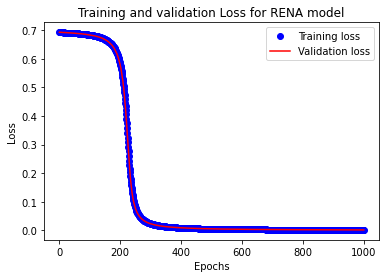

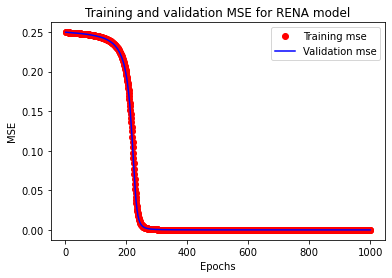

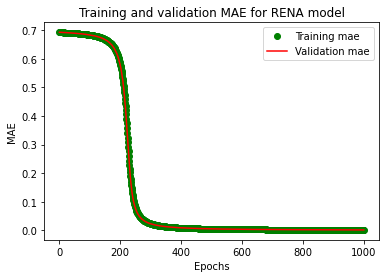

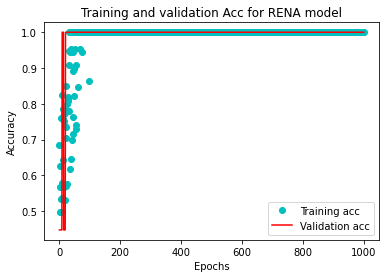

In [28]:
import matplotlib.pyplot as plt
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
mse = history_lstm.history['mse']
val_mse = history_lstm.history['val_mse']
mae = history_lstm.history['mae']
val_mae = history_lstm.history['val_mae']
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation Loss for RENA model')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, mse, 'ro', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and validation MSE for RENA model')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'go', label='Training mae')
plt.plot(epochs, val_loss, 'r', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation MAE for RENA model')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation Acc for RENA model')
plt.legend()
plt.show()

In [42]:
#1000 epoch
from sklearn.metrics import f1_score, precision_score, recall_score

print(precision_score(y_test.argmax(axis=1), out_te.argmax(axis=1) , average="macro"))
print(recall_score(y_test.argmax(axis=1), out_te.argmax(axis=1) , average="macro"))
print(f1_score(y_test.argmax(axis=1), out_te.argmax(axis=1) , average="macro"))

1.0
1.0
1.0


In [43]:
# save model
import h5py
model_rnn.save('biogrid samples/deep_model_undersample_RNN_SC-AT.h5')
model_rnn.save_weights('biogrid samples/deep_model_undersample_RNN_weights_SC-AT.h5')

## test tune model for real data

In [27]:
from keras.models import load_model
#del model_rnn
model_rnn = load_model('biogrid samples/deep_model_undersample_RNN_SC-AT.h5') 
model_rnn.load_weights('biogrid samples/deep_model_undersample_RNN_weights_SC-AT.h5', by_name=True) 

In [44]:
# without resample
result_trn = model_rnn.evaluate(X_train, y_train)
result_trn

477/477 [==============================] - 0s 102us/step


[0.0011396761641952852, 1.0, 0.0011390217114239931, 1.300912458646053e-06]

In [45]:
%%time
out_trn=model_rnn.predict(X_train)
out_trn

Wall time: 115 ms


array([[0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train.argmax(axis=1), out_trn.argmax(axis=1)))

[[231   0]
 [  0 246]]


In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_train.argmax(axis=1), out_trn.argmax(axis=1) , average="macro"))
print(recall_score(y_train.argmax(axis=1), out_trn.argmax(axis=1) , average="macro"))
print(f1_score(y_train.argmax(axis=1), out_trn.argmax(axis=1) , average="macro"))

1.0
1.0
1.0


In [48]:
# without resample
result_ten = model_rnn.evaluate(X_test, y_test)
result_ten

53/53 [==============================] - 0s 188us/step


[0.0011584171344403108, 1.0, 0.0011577463010326028, 1.3436377912512398e-06]

In [49]:
%%time
out_ten=model_rnn.predict(X_test)
out_ten

Wall time: 5.98 ms


array([[0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.99879956, 0.00120044],
       [0.99879956, 0.00120044],
       [0.00108135, 0.99891865],
       [0.

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.argmax(axis=1), out_ten.argmax(axis=1)))

[[34  0]
 [ 0 19]]


In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(precision_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))
print(recall_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))
print(f1_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))

1.0
1.0
1.0


# test for real data with undersampling model

In [28]:
# without resample
result_ten = model_rnn.evaluate(X_test, y_test)
result_ten

34385407/34385407 [==============================] - 2262s 66us/step

[0.001142438177751, 1.0, 0.0011393504013214, 1.3018070520334468e-06]


In [29]:
%%time
out_ten=model_rnn.predict(X_test)
out_ten

Wall time: 19min 27s


array([[5.5663445e-06, 9.9999440e-01],
       [5.5663445e-06, 9.9999440e-01],
       [5.5663445e-06, 9.9999440e-01],
       ...,
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06]], dtype=float32)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.argmax(axis=1), out_ten.argmax(axis=1)))

[[34385142        0]
 [       0      265]]


In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))
print(recall_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))
print(f1_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))

1.0
1.0
1.0
